<a href="https://colab.research.google.com/github/LIvanoff/Big-Data-analysis-technologies-and-tools/blob/main/pr7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier

## Задача 1

Найти данные для задачи классификации или для задачи регрессии
(данные не должны повторятся в группе).

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset13.xlsx to dataset13.xlsx


In [ ]:
df = pd.read_excel('dataset13.xlsx')
df

,ctWinRate,tWinRate,roundNum,ctScore,tScore,ctTeam,tTeam,ctFreezeTimeEndEqVal,ctRoundStartEqVal,ctBuyType,tFreezeTimeEndEqVal,tRoundStartEqVal,tBuyType,ctResult,tResult,winningTeam,losingTeam
0,52.9,47.1,1,0.0000,0.0000,1,0,4.30,1.00,0,3.70,1.00,0,1,0,1,0
1,52.9,47.1,2,0.0625,0.0000,1,0,20.45,3.00,3,5.25,1.00,1,0,1,0,1
2,52.9,47.1,3,0.0625,0.0625,1,0,11.55,4.90,2,22.35,7.35,3,0,1,0,1
3,52.9,47.1,4,0.0625,0.1250,1,0,5.20,4.70,1,22.55,11.20,3,0,1,0,1
4,52.9,47.1,5,0.0625,0.1875,1,0,23.80,1.00,3,27.05,8.40,3,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111388,53.9,46.1,24,0.6875,0.7500,309,293,29.70,19.95,3,25.30,5.50,3,0,1,293,309
111389,53.9,46.1,25,0.6875,0.8125,309,293,23.80,1.00,3,27.45,4.70,3,0,1,293,309
111390,53.9,46.1,26,0.6875,0.8750,309,293,10.10,4.35,2,27.45,19.85,3,1,0,309,293
111391,53.9,46.1,27,0.7500,0.8750,309,293,31.20,15.50,3,26.95,1.00,3,0,1,293,309


In [ ]:
df = df.drop(['winningTeam','losingTeam', 'tResult'], axis=1)
df

,ctWinRate,tWinRate,roundNum,ctScore,tScore,ctTeam,tTeam,ctFreezeTimeEndEqVal,ctRoundStartEqVal,ctBuyType,tFreezeTimeEndEqVal,tRoundStartEqVal,tBuyType,ctResult
0,52.9,47.1,1,0.0000,0.0000,1,0,4.30,1.00,0,3.70,1.00,0,1
1,52.9,47.1,2,0.0625,0.0000,1,0,20.45,3.00,3,5.25,1.00,1,0
2,52.9,47.1,3,0.0625,0.0625,1,0,11.55,4.90,2,22.35,7.35,3,0
3,52.9,47.1,4,0.0625,0.1250,1,0,5.20,4.70,1,22.55,11.20,3,0
4,52.9,47.1,5,0.0625,0.1875,1,0,23.80,1.00,3,27.05,8.40,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111388,53.9,46.1,24,0.6875,0.7500,309,293,29.70,19.95,3,25.30,5.50,3,0
111389,53.9,46.1,25,0.6875,0.8125,309,293,23.80,1.00,3,27.45,4.70,3,0
111390,53.9,46.1,26,0.6875,0.8750,309,293,10.10,4.35,2,27.45,19.85,3,1
111391,53.9,46.1,27,0.7500,0.8750,309,293,31.20,15.50,3,26.95,1.00,3,0


In [ ]:
y = df['ctResult'].values
X = df.drop(['ctResult'], axis=1).values

In [ ]:
X.shape, y.shape

((111393, 13), (111393,))

In [ ]:
stand_sc = StandardScaler()
X = stand_sc.fit_transform(X)

Разделим данные на тренировочную и отложенную выборку

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.15)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((94684, 13), (16709, 13), (94684,), (16709,))

## Задание 2

Реализовать баггинг

In [ ]:
clf = RandomForestClassifier(max_depth=15, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=42)

In [ ]:
accuracy_score(clf.predict(X_test), y_test)

0.6460590101143097

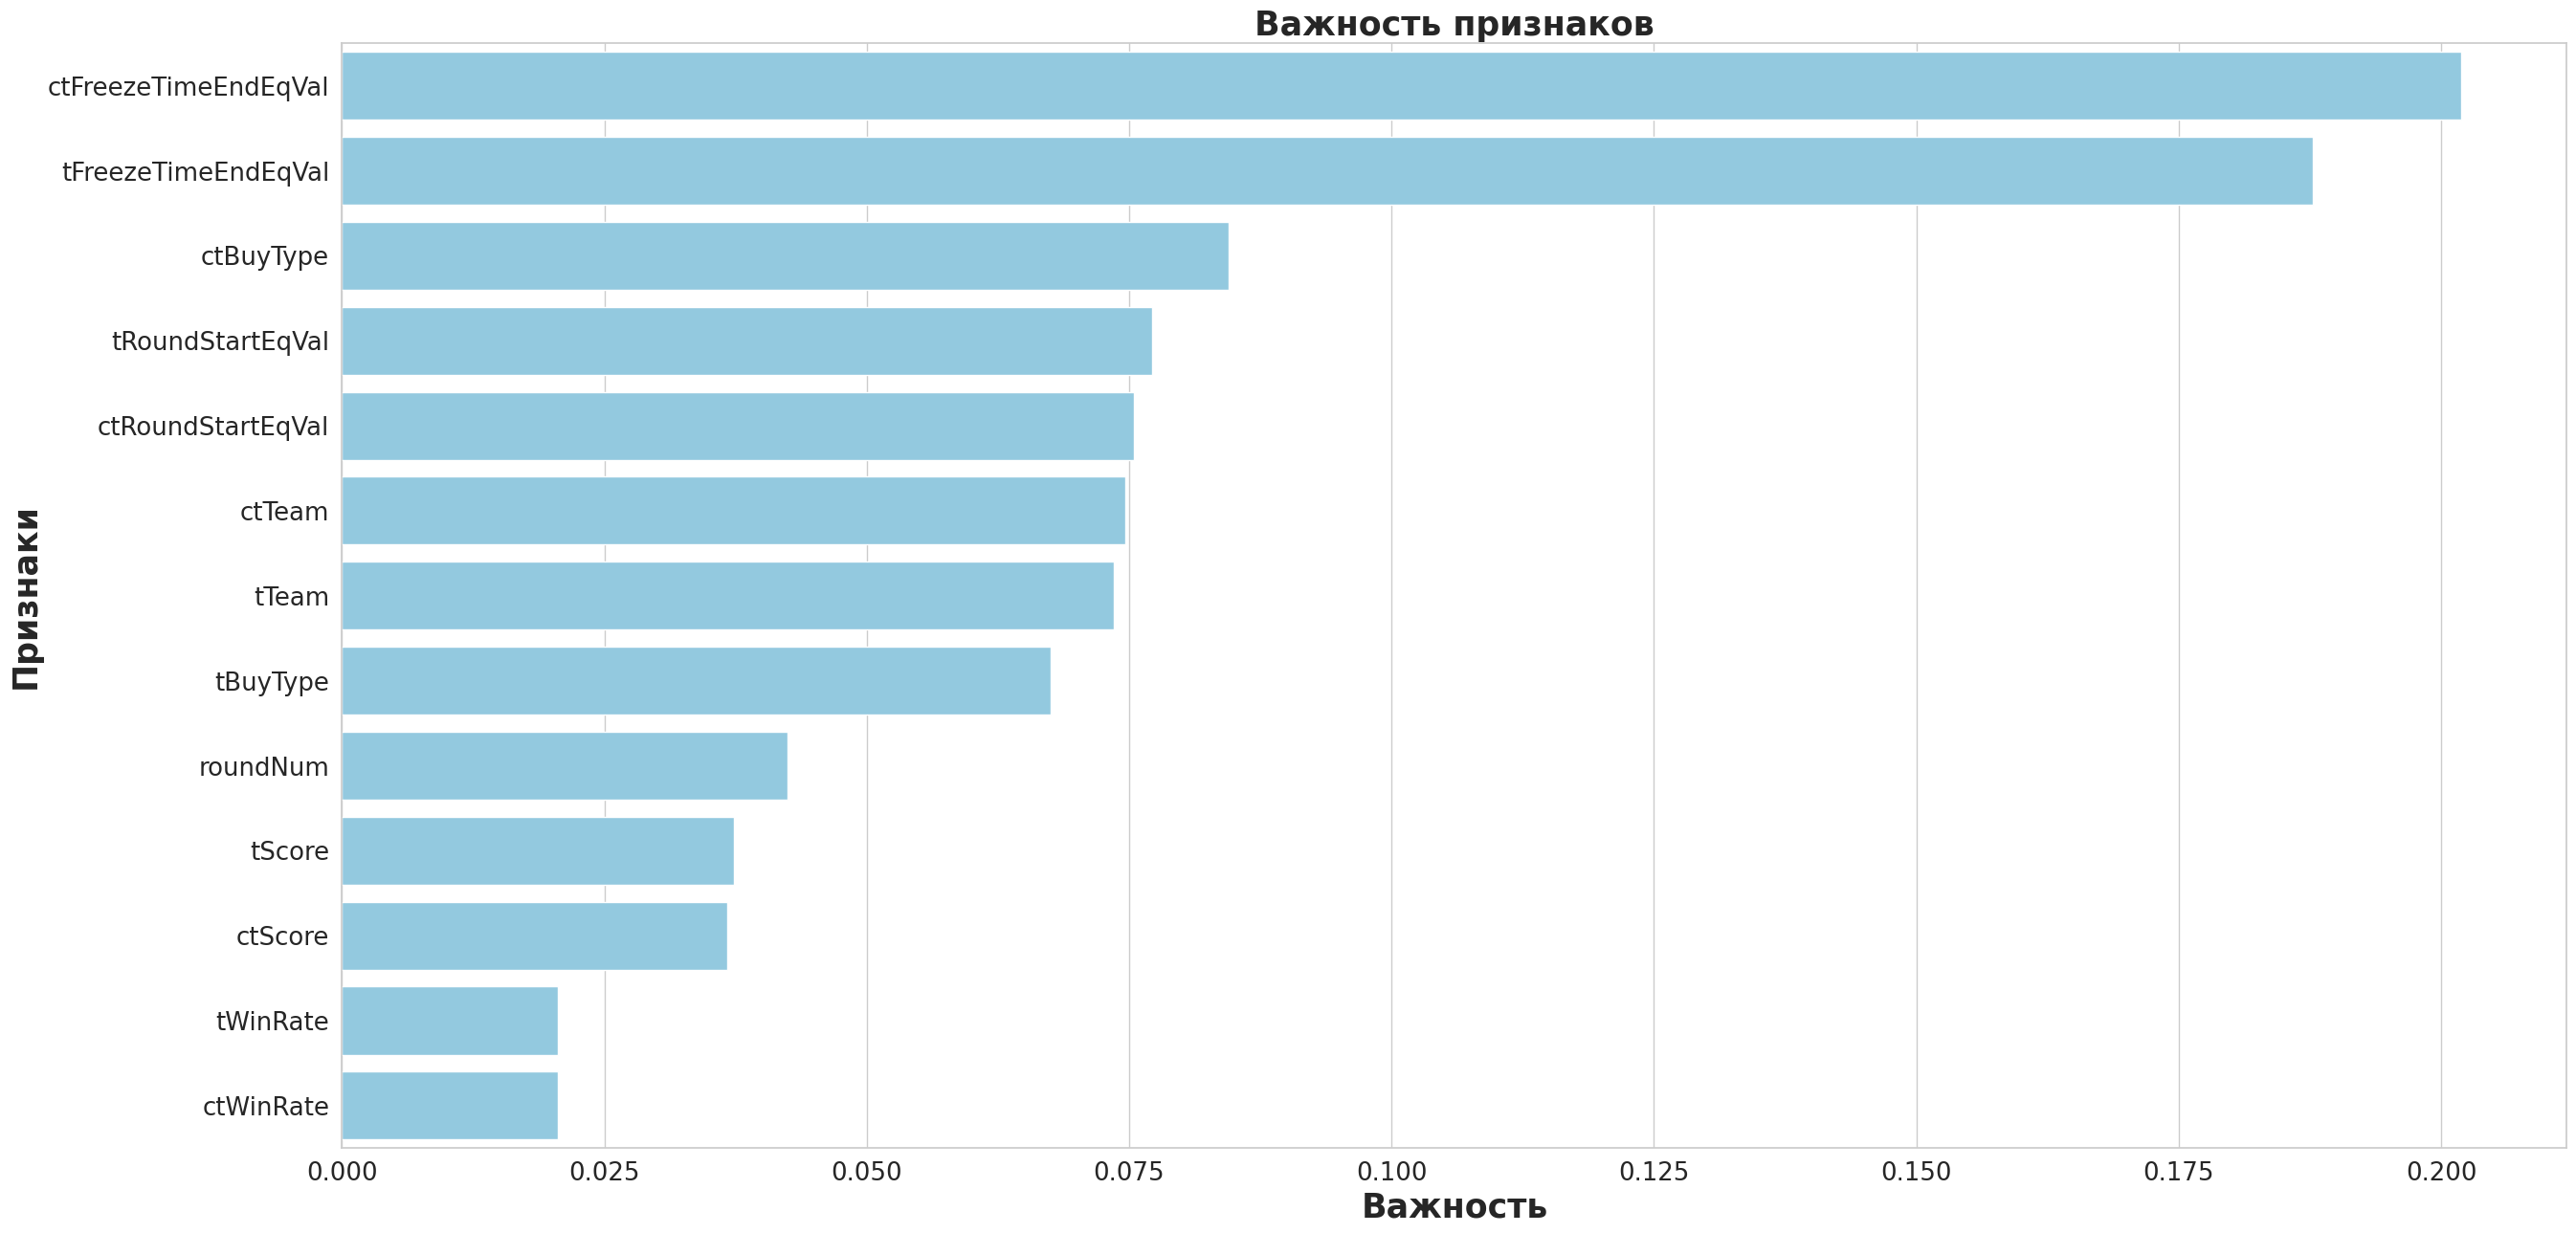

None

,Features,Gini-Importance
0,ctFreezeTimeEndEqVal,0.201870
1,tFreezeTimeEndEqVal,0.187807
2,ctBuyType,0.084445
3,tRoundStartEqVal,0.077222
4,ctRoundStartEqVal,0.075448
5,ctTeam,0.074588
6,tTeam,0.073517
7,tBuyType,0.067520
8,roundNum,0.042413
9,tScore,0.037333


In [ ]:
feats = {}
for feature, importance in zip(df.columns, clf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Важность', fontsize=25, weight = 'bold')
plt.ylabel('Признаки', fontsize=25, weight = 'bold')
plt.title('Важность признаков', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

## Задание 3

Реализовать бустинг на тех же данных, что использовались для баггинга.


In [ ]:
cat = CatBoostClassifier(
    # cat_features=cat_cols,
    iterations=1000,
    # task_type="GPU",
    random_seed=42,
    loss_function='Logloss' #  No boosting_type='Plain', bootstrap_type='Bernoulli',
    )

cat.fit(X_train,
        y_train,
        # cat_features=cat_cols,
        verbose=False,
        plot=True,
        eval_set=(X_test, y_test)
        )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
print(f'Accuracy Score: {accuracy_score(cat.predict(X_test), y_test)}')

Accuracy Score: 0.6512059369202227


## Задание 4

Сравнить результаты работы алгоритмов (время работы и качество моделей)

Сравнивать время работы в данном случае не совсем корректно, учитывая тот факт, что у Рандомного леса отсутствует гиперпараметр iterations. Но как можно видеть модель обученная с помощью CatBoost получила прирост в точности.